## Continuous distributions

* Density instead of probability.
* The density of CRV is a function that describes the relative likelihood the variable will have a particular value.  
* Probability Density Function (PDF) is non-negative and its integral over the entire set of possible values is equal to one.
* Cumulative Distribution Function (CDF) for continuous random variables is given by:

$$F(x) = \int_{-\infty}^{x} f(u) du$$,
if $f$ is continuous at $x$, then:
$$f(x) = \frac{d}{dx}F(x)$$

* We can think of $f(x) dx$ as the probability of $X$ falling within infinitesimal interval $[x, x + dx]$.

* The most common continuous distribution is the normal (or Gaussian distribution). It has a density given by:


$$f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

* $\mu$ (mean), $\sigma^2$ (variance) $\rightarrow N(\mu, \sigma^2)$ 

* Changing $\mu$: translates the distributions
* Changing $\sigma^2$: widens or narrows the distributions 
* $N(0,1)$: standard normal distribution.
* *Central limit theorem* $\rightarrow$ the sum of a large number of random variables, regardless of their distribution, is distributed approximately normally. 

## Distributions

Family:
* Normal
* Uniform
* Poisson

4 items can be calculated for statistical dists:
* Density (point probability) (`d*`)
* Cumulative distribution function
* Quantiles (`q*`)
* Random numbers (`r*`)


Root function: `norm`

## Density

* Continuous dist: A measure of the relative probability of getting a value close to $x$.
* Discrete dist: the probability of getting exactly the value $x$.
* Weibull continuous dist. provides a good description for wind speeds.

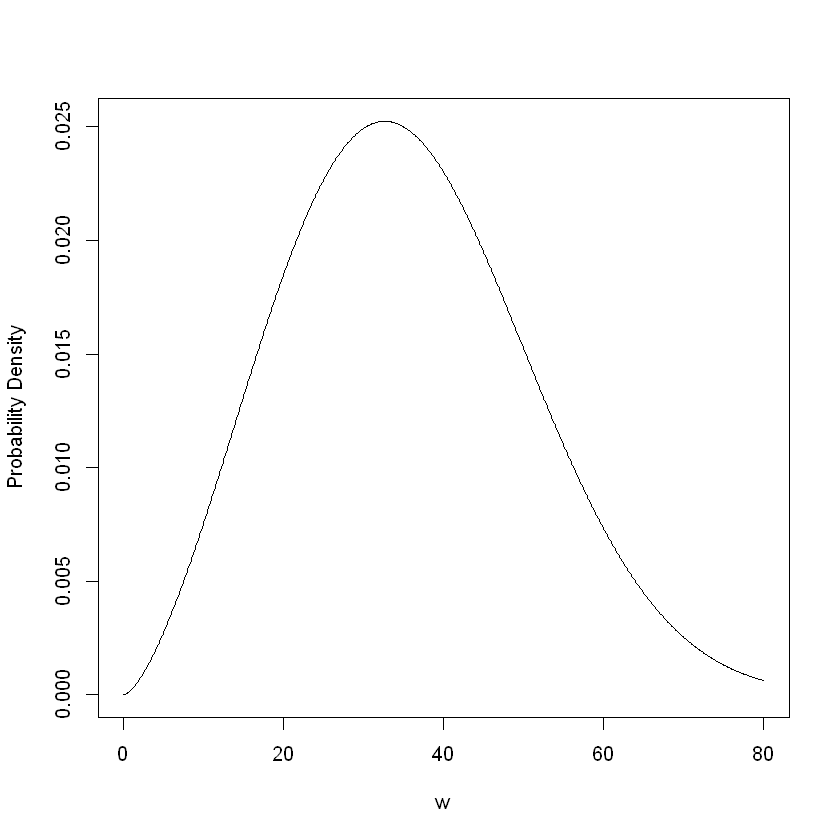

In [1]:
# generates equidistant values in the range from 0 to 80, in steps of 0.1
w <- seq(0,80,.1)
plot(w, dweibull(w, shape = 2.5, scale=40),
    type='l', ylab='Probability Density')
# set to values that describe tropical cyclone wind speeds

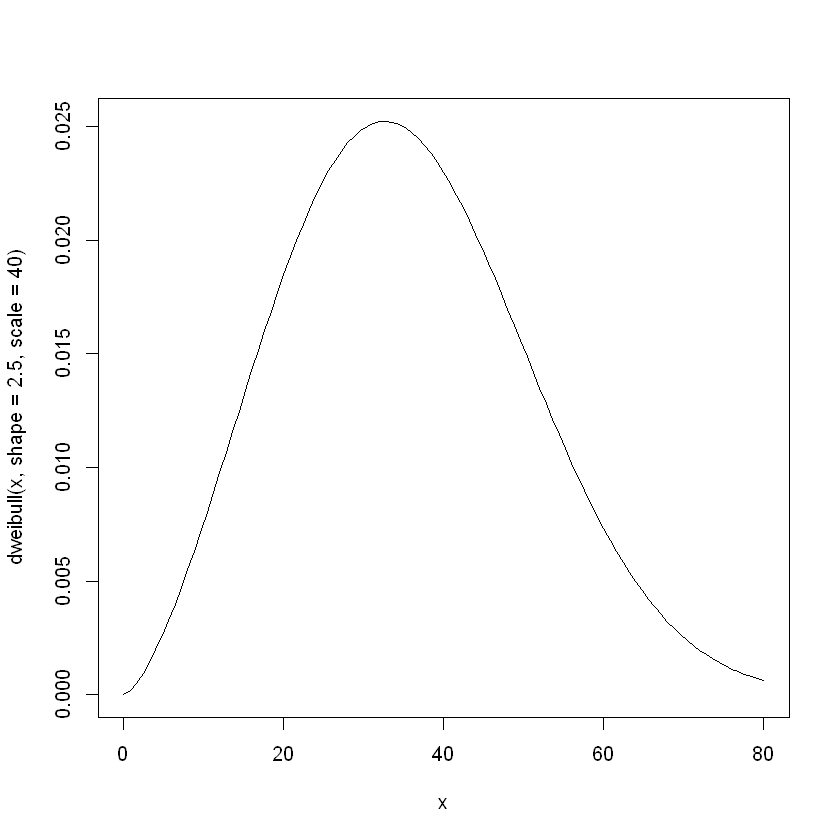

In [2]:
curve(dweibull(x, shape=2.5, scale=40),
     from=0, to=80)

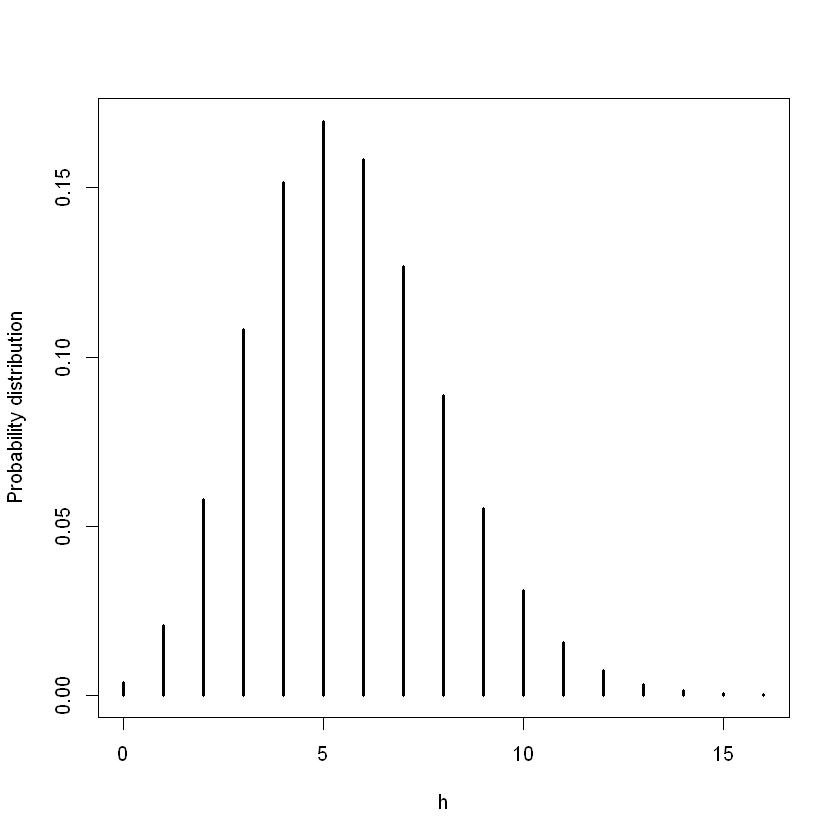

In [3]:
# Poisson distribution is a good description for hurricane counts
h <- 0:16
plot(h, dpois(h, lambda=5.6), type='h', lwd=3,
    ylab='Probability distribution')

* Poisson dist. is a limiting form of the binomial dist. with no upper bound on the number of occurences.
* The rate parameter $(\lambda)$ characterizes this stochastic process. For small values of $\lambda$, the distribution is positively skewed.

## Cumulative Distribution Functions

* Define the probability less than or equal to a value $x$.

### Continuous

In [4]:
NAO <- read.table("NAO.txt", header=T)
nao <- NAO$Jun # Jun NAO

In [5]:
# The chance that a June NAO value is less than or equal to -1.5
pnorm(-1.5, mean=mean(nao), sd=sd(nao))

[1] 0.2169666

### Discrete

In [6]:
H <- read.table('H.txt', header=T)

In [7]:
annual_rateEH <- mean(H$E) # lambda

# Probability of next year having no Hurricane
ppois(0, lambda=mean(H$E))

[1] 0.625784

In [8]:
round(ppois(0, lambda=mean(H$E)), digits=3) * 100

[1] 62.6

## Quantile functions

* Median value: 0.5 quantile
* In tests of statistical significance the $p-$quantile is usually set at $p=0.05$
* It's called $\alpha=p\times100\%$ significance level
* $p-$value is the probability of obtaining a value as large, or larger, than the $p-$quantile
* 95 % Confidence Interval for $\mu$ is obtained as:
$$\bar{x}+\frac{\sigma}{\sqrt{n}} \times N_{.025} \leq \mu \leq \bar{x} + \frac{\sigma}{\sqrt{N}} \times N_{.975}$$

* $N_{0.025}$ & $N_{0.075}$ $\rightarrow$ 2.5 & 97.5 percentiles of the standard normal distribution, respectively.  

In [15]:
xbar <- mean(nao)
sigma <- sd(nao)
n <- length(nao)
sem <- sigma / sqrt(n)
bottom <- xbar + sem * qnorm(.025)
top <- xbar + sem * qnorm(.975)
interval <- c(bottom, top) # 95% CI
print(interval)

[1] -0.6035901 -0.1609099


* Normal dist is symmetric
* $-N_{0.025} = N_{0.975}$

In [16]:
-qnorm(0.025); qnorm(0.975)

[1] 1.959964

[1] 1.959964

Another way to write CI:

$$\bar{x} \pm \frac{\sigma}{\sqrt{n}}\times \Phi^-1$$

, where:
* $\Phi$: CDF of the Standard Normal Distribution

## Random Numbers

In [17]:
# generate 10 random nums from a standard normal dist.
rnorm(10)

[1] -0.223577659 -0.637319014 -1.769490815 -1.336107164 -0.073243975
 [6]  1.904530438  0.001636517 -0.942354139 -0.460615668 -1.343512445

In [18]:
# set random number generator (RNG)
set.seed(3042)
rnorm(10)

[1]  0.6442682 -0.4606582  1.4002303  1.1230138  0.9082837  0.3199879
 [7] -1.0137925 -0.2408401  0.5233514 -1.6942828

Using Mersenne Twister pseudorandom number generator (Matsumoto and Nishimura, 1998) with a seed value of 3042. 

In [19]:
head(H)

Year All MUS G FL E
1 1851 1   1   0 1  0
2 1852 3   1   1 2  0
3 1853 0   0   0 0  0
4 1854 2   1   1 0  1
5 1855 1   1   1 0  0
6 1856 2   1   1 1  0

Simulation of the next 20 years of Florida Hurricane counts based on the counts over the historical records:

In [20]:
rpois(20, lambda = mean(H$FL))

[1] 1 1 1 1 3 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0

Maximum wind speed ($m.s^{-1}$) from the next 10 tropical cyclones:

In [21]:
rweibull(10, shape=2.5, scale=50)

[1]  51.65543  38.71916  18.16796  30.53956  41.18523  82.73192  47.90923
 [8] 100.39825  26.12826  21.26919